<a href="https://colab.research.google.com/github/dibyanshubhatt/Classification-of-Weed-/blob/main/AlexNet_Copy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#AlexNet1
#pip install split-image
#pip install matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
from google.colab import files

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import libs
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS= 30

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/gdrive/MyDrive/cabbage_resizedAlexNet", seed=123,shuffle=True, image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)

Found 2091 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['cabbage', 'empty field', 'weed']

In [ ]:

for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())


(32, 256, 256, 3)
[2 2 2 2 1 0 0 0 2 2 0 2 2 0 1 2 0 2 1 0 0 2 2 0 2 0 2 2 1 0 0 2]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(24, 24))
for image_batch, labels_batch in dataset.take(1):
    for i in range(32):
        ax = plt.subplot(4, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
# AlexNet
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

input_shapeAx = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
modelAx=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(256,256,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(n_classes,activation='softmax')
])


In [ ]:
modelAx.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       46592     
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 256)       819456    
                                                                 
 batch_normalization_1 (Batc  (None, 31, 31, 256)      1024      
 hNormalization)                                                 
                                                      

In [ ]:
modelAx.compile(loss='sparse_categorical_crossentropy',optimizer=tf.optimizers.SGD(learning_rate=0.001),metrics=['accuracy']  )

In [ ]:
historyAx = modelAx.fit(train_ds, epochs=40,validation_data=val_ds, validation_freq=1)
#ihistoryAx=imodelAx.fit(train_ds, epochs=30,validation_data=val_ds,validation_freq=1)

Epoch 1/40
52/52 [==============================] - 3s 49ms/step - loss: 0.7343 - accuracy: 0.7290 - val_loss: 1.5399 - val_accuracy: 0.4531
Epoch 2/40
52/52 [==============================] - 3s 55ms/step - loss: 0.5203 - accuracy: 0.8040 - val_loss: 1.0417 - val_accuracy: 0.5521
Epoch 3/40
52/52 [==============================] - 2s 43ms/step - loss: 0.4266 - accuracy: 0.8469 - val_loss: 0.8023 - val_accuracy: 0.6042
Epoch 4/40
52/52 [==============================] - 2s 43ms/step - loss: 0.3736 - accuracy: 0.8651 - val_loss: 1.6372 - val_accuracy: 0.5312
Epoch 5/40
52/52 [==============================] - 2s 43ms/step - loss: 0.3271 - accuracy: 0.8790 - val_loss: 0.6342 - val_accuracy: 0.7552
Epoch 6/40
52/52 [==============================] - 2s 43ms/step - loss: 0.2788 - accuracy: 0.9008 - val_loss: 1.2357 - val_accuracy: 0.5990
Epoch 7/40
52/52 [==============================] - 2s 44ms/step - loss: 0.2812 - accuracy: 0.8941 - val_loss: 0.2664 - val_accuracy: 0.8854
Epoch 8/40
52

In [ ]:
#scoresAx = modelAx.evaluate(test_ds)

In [ ]:
#scoresAx

In [ ]:
historyAx

In [ ]:
historyAx.params

{'verbose': 1, 'epochs': 40, 'steps': 52}

In [ ]:
historyAx.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
type(historyAx.history['loss'])

list

In [ ]:
len(historyAx.history['loss'])

40

In [ ]:
len(historyAx.history['accuracy'])

40

In [ ]:
historyAx.history['loss'][:5] # show loss for first 5 epochs

NameError: ignored

In [ ]:
accAx = historyAx.history['accuracy']
val_accAx = historyAx.history['val_accuracy']
lossAx = historyAx.history['loss']
val_lossAx = historyAx.history['val_loss']

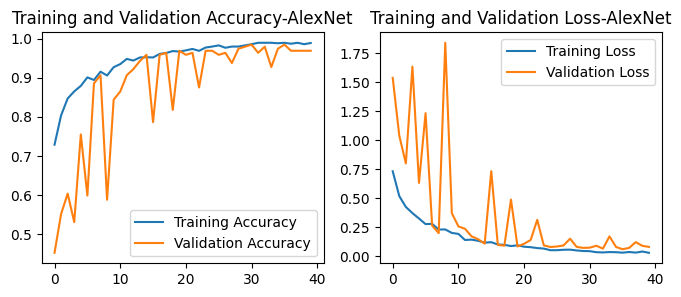

In [ ]:
EPOCHS=40
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accAx, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accAx, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy-AlexNet')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), lossAx, label='Training Loss')
plt.plot(range(EPOCHS), val_lossAx, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss-AlexNet')
plt.show()

first image to predict
actual label: weed
1/1 [==============================] - 0s 210ms/step
predicted label: weed
first image to predict
actual label: weed
1/1 [==============================] - 0s 31ms/step
predicted label: weed


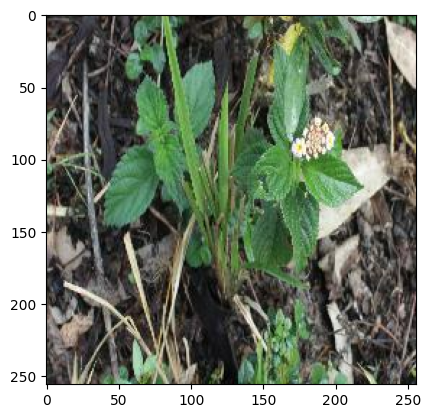

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(2):

    first_image = images_batch[30].numpy().astype('uint8')
    first_label = labels_batch[30].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = modelAx.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[30])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
import matplotlib.pyplot as plt

def predict(model, image):
    # Implementation of the predict function is missing
    pass

# Assuming you have defined the class_names and Test_dataset variables

# Function to display images with actual and predicted labels
def display_images(dataset, model, dataset_num):
    plt.figure(figsize=(24, 24))
    for images, labels in dataset.take(dataset_num):
        for i in range(32):
            ax = plt.subplot(4, 8, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            predicted_class, confidence = predict(model, images[i].numpy())
            actual_class = class_names[labels[i]]

            plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
            plt.axis("off")
    plt.show()



In [ ]:
# Assuming Test_dataset1 is a list of images
#display_images(Test_dataset1, modelAx, 20)
#display_images(Test_dataset1, modelAx, 2)
#display_images(Test_dataset1, modelAx, 3)
#display_images(Test_dataset1, modelAx, 4)


In [ ]:
'''print("data for conf matrix-AlexNet")
plt.figure(figsize=(24, 24))
for images, labels in test_ds.take(20):
    i=0
    for i in range(32):
        ax = plt.subplot(9, 8, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

       # predicted_class, confidence = predict(modelAx, images[i].numpy())
        actual_class = class_names[labels[i]]

        #plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}")

        plt.axis("off")'''

'print("data for conf matrix-AlexNet")\nplt.figure(figsize=(24, 24))\nfor images, labels in test_ds.take(20):\n    i=0\n    for i in range(32):\n        ax = plt.subplot(9, 8, i + 1)\n        plt.imshow(images[i].numpy().astype("uint8"))\n\n       # predicted_class, confidence = predict(modelAx, images[i].numpy())\n        actual_class = class_names[labels[i]]\n\n        #plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}")\n\n        plt.axis("off")'

In [ ]:
'''print("data for conf matrix-AlexNet")
plt.figure(figsize=(24, 24))
for images, labels in test_ds.take(2):  # Reduce the loop range for testing
    num_images = min(images.shape[0], 32)  # Make sure to not exceed the actual number of images
    for i in range(num_images):
        ax = plt.subplot(9, 8, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        actual_class = class_names[labels[i]]  # Assuming class_names is a list or array of class names

        plt.title(f"Actual: {actual_class}")
        plt.axis("off")

plt.show()'''


'print("data for conf matrix-AlexNet")\nplt.figure(figsize=(24, 24))\nfor images, labels in test_ds.take(2):  # Reduce the loop range for testing\n    num_images = min(images.shape[0], 32)  # Make sure to not exceed the actual number of images\n    for i in range(num_images):\n        ax = plt.subplot(9, 8, i + 1)\n        plt.imshow(images[i].numpy().astype("uint8"))\n\n        actual_class = class_names[labels[i]]  # Assuming class_names is a list or array of class names\n\n        plt.title(f"Actual: {actual_class}")\n        plt.axis("off")\n\nplt.show()'

In [ ]:
#Test Data
Test_dataset1 = tf.keras.preprocessing.image_dataset_from_directory("/content/gdrive/MyDrive/cabbage_resizedAlexNetTest", seed=0,shuffle=False, image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)

Found 300 files belonging to 3 classes.


In [ ]:
for image_batch, labels_batch in Test_dataset1.take(20):
    print(labels_batch.numpy())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
'''from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted labels stored in `alexnet_predictions` and true labels in `true_labels`
Alexnet_predictions = []  # Store the predictions made by the AlexNet model
true_labels = []  # Store the true labels for the corresponding images

for images_batch, labels_batch in Test_dataset1.take(20):
    # Resize images to the expected shape
    resized_images = tf.image.resize(images_batch, (224, 224))
  #  predictions = modelAx.predict(resized_images)
  #  predicted_labels = np.argmax(predictions, axis=1)

    batch_prediction.extend(predicted_labels)
    true_labels.extend(labels_batch.numpy())

'''

In [ ]:
'''# Create the confusion matrix
cm = confusion_matrix(true_labels, resnet_predictions)

# Print the confusion matrix
print("Confusion Matrix (ResNet):")
print(cm)

# Plot the confusion matrix as a graph
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (ResNet)')
plt.colorbar()
classes=['cabbage', 'empty field', 'weed']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
'''

1/1 [==============================] - 0s 41ms/step
1: cabbage ---> cabbage
1/1 [==============================] - 0s 41ms/step
2: cabbage ---> cabbage
1/1 [==============================] - 0s 54ms/step
3: cabbage ---> cabbage
1/1 [==============================] - 0s 54ms/step
4: cabbage ---> cabbage
1/1 [==============================] - 0s 48ms/step
5: cabbage ---> cabbage
1/1 [==============================] - 0s 57ms/step
6: cabbage ---> cabbage
1/1 [==============================] - 0s 51ms/step
7: cabbage ---> cabbage
1/1 [==============================] - 0s 38ms/step
8: cabbage ---> cabbage
1/1 [==============================] - 0s 42ms/step
9: cabbage ---> cabbage
1/1 [==============================] - 0s 55ms/step
10: cabbage ---> cabbage
1/1 [==============================] - 0s 47ms/step
11: cabbage ---> cabbage
1/1 [==============================] - 0s 47ms/step
12: cabbage ---> cabbage
1/1 [==============================] - 0s 54ms/step
13: cabbage ---> cabbage
1/1 [===

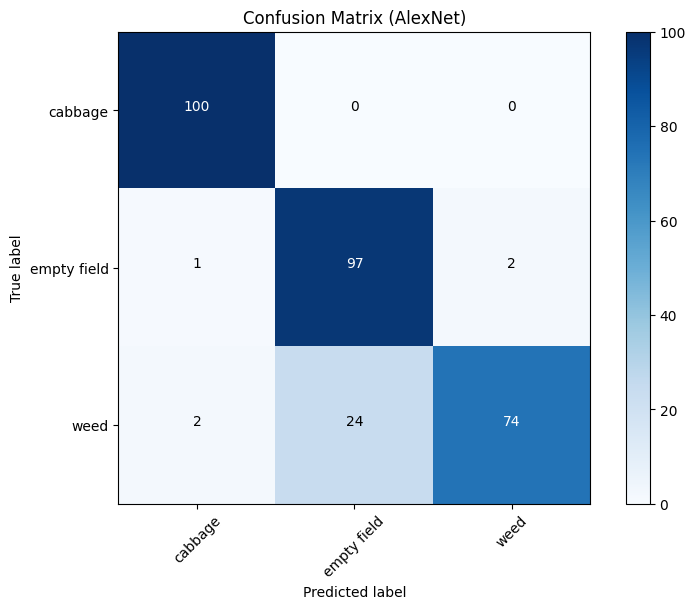

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted labels stored in `alexnet_predictions` and true labels in `true_labels`
alexnet_predictions = []  # Store the predictions made by the AlexNet model
true_labels = []  # Store the true labels for the corresponding images

j = 1

for images_batch, labels_batch in Test_dataset1.take(20):
    for i in range(32):
        first_image = images_batch[i].numpy().astype('uint8')
        first_label = labels_batch[i].numpy()
        batch_prediction = modelAx.predict(images_batch)
        predicted_label = np.argmax(batch_prediction[i])

        alexnet_predictions.append(predicted_label)
        true_labels.append(first_label)

        print(str(j) + ": " + class_names[first_label] + " ---> " + class_names[predicted_label])
        j += 1
        if j == 301:
            break

# Create the confusion matrix
cm = confusion_matrix(true_labels, alexnet_predictions)

# Print the confusion matrix
print("Confusion Matrix (AlexNet):")
print(cm)

# Plot the confusion matrix as a graph
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (AlexNet)')
plt.colorbar()
classes = ['cabbage', 'empty field', 'weed']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the predicted labels stored in `alexnet_predictions` and true labels in `true_labels`

# Calculate accuracy
accuracy = accuracy_score(true_labels, alexnet_predictions)
print("Accuracy : {:.2f}".format(accuracy ))

# Calculate precision
precision = precision_score(true_labels, alexnet_predictions, average='weighted')
print("Precision : {:.2f}".format(precision ))

# Calculate recall
recall = recall_score(true_labels, alexnet_predictions, average='weighted')
print("Recall : {:.2f}".format(recall ))

# Calculate F1 score
f1 = f1_score(true_labels, alexnet_predictions, average='weighted')
print("F1 Score : {:.2f}".format(f1 ))


Accuracy : 0.90
Precision : 0.92
Recall : 0.90
F1 Score : 0.90


In [ ]:
#improved AlexNet

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

#input_shapeAx = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
#n_classes = 3
#modelAx=keras.models.Sequential([
#    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(256,256,3)),
#
#


# Define the input shape, number of classes, and model architecture
input_shapeAx = (256, 256, 3)
n_classes = 3

imodelAx = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(256,256,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=1024, kernel_size=(9, 9), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    keras.layers.Conv2D(filters=1024, kernel_size=(7, 7), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=512, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    # Additional convolutional layers
    keras.layers.Conv2D(filters=1024, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=1024, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=512, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(5, 5)),
    keras.layers.Conv2D(filters=512, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    #keras.layers.MaxPool2D(pool_size=(5, 5)),
    keras.layers.Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    #keras.layers.MaxPool2D(pool_size=(2, 2)),
    # Additional End


    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(n_classes,activation='softmax')
])

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Define the input shape, number of classes, and model architecture
input_shapeAx = (256, 256, 3)
n_classes = 3

#imodelAx = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shapeAx),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=512, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=512, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(n_classes, activation='softmax')
])


ValueError: ignored

In [ ]:
imodelAx.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_253 (Conv2D)         (None, 62, 62, 128)       46592     
                                                                 
 batch_normalization_251 (Ba  (None, 62, 62, 128)      512       
 tchNormalization)                                               
                                                                 
 max_pooling2d_129 (MaxPooli  (None, 31, 31, 128)      0         
 ng2D)                                                           
                                                                 
 conv2d_254 (Conv2D)         (None, 31, 31, 256)       819456    
                                                                 
 batch_normalization_252 (Ba  (None, 31, 31, 256)      1024      
 tchNormalization)                                               
                                                     

In [ ]:
imodelAx.compile(loss='sparse_categorical_crossentropy',optimizer=tf.optimizers.SGD(learning_rate=0.001),metrics=['accuracy']  )


In [ ]:
ihistoryAx=imodelAx.fit(train_ds,epochs=40,validation_data=val_ds,validation_freq=1)

Epoch 1/40
 6/52 [==>...........................] - ETA: 23s - loss: 0.2914 - accuracy: 0.9219

KeyboardInterrupt: ignored

In [ ]:
iaccAx = ihistoryAx.history['accuracy']
ival_accAx = ihistoryAx.history['val_accuracy']
ilossAx = ihistoryAx.history['loss']
ival_lossAx = ihistoryAx.history['val_loss']

In [ ]:
EPOCHS=40
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), iaccAx, label='Training Accuracy')
plt.plot(range(EPOCHS), ival_accAx, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy-Imp. AlexNet')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), ilossAx, label='Training Loss')
plt.plot(range(EPOCHS), ival_lossAx, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('   Training & Validation Loss-Imp. AlexNet')
plt.show()

In [ ]:
print("conf matrix for improved alexNet")
import numpy as np
j=1
for images_batch, labels_batch in Test_dataset1.take(20):
    i=0
    for i in range(32):
        first_image = images_batch[i].numpy().astype('uint8')
        first_label = labels_batch[i].numpy()
       #print("first image to predict")
       #plt.imshow(first_image)
        batch_prediction = imodelAx.predict(images_batch)
        print(str(j)+": "+class_names[first_label]+"---> "+class_names[np.argmax(batch_prediction[i])])
        j=j+1
        if j==301:
           break

conf matrix for improved alexNet
1/1 [==============================] - 0s 257ms/step
1: cabbage---> cabbage
1/1 [==============================] - 0s 33ms/step
2: cabbage---> cabbage
1/1 [==============================] - 0s 41ms/step
3: cabbage---> cabbage
1/1 [==============================] - 0s 35ms/step
4: cabbage---> cabbage
1/1 [==============================] - 0s 33ms/step
5: cabbage---> cabbage
1/1 [==============================] - 0s 32ms/step
6: cabbage---> cabbage
1/1 [==============================] - 0s 34ms/step
7: cabbage---> cabbage
1/1 [==============================] - 0s 31ms/step
8: cabbage---> cabbage
1/1 [==============================] - 0s 31ms/step
9: cabbage---> cabbage
1/1 [==============================] - 0s 36ms/step
10: cabbage---> cabbage
1/1 [==============================] - 0s 38ms/step
11: cabbage---> cabbage
1/1 [==============================] - 0s 34ms/step
12: cabbage---> cabbage
1/1 [==============================] - 0s 36ms/step
13: cabbage

In [ ]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted labels stored in `resnet_predictions` and true labels in `true_labels`
resnet_predictions = []  # Store the predictions made by the ResNet model
true_labels = []  # Store the true labels for the corresponding images

for images_batch, labels_batch in Test_dataset1.take(20):
    # Resize images to the expected shape
    resized_images = tf.image.resize(images_batch, (224, 224))

    predictions = imodelAx.predict(resized_images)
    predicted_labels = np.argmax(predictions, axis=1)

    resnet_predictions.extend(predicted_labels)
    true_labels.extend(labels_batch.numpy())

# Create the confusion matrix
cm = confusion_matrix(true_labels, resnet_predictions)

# Print the confusion matrix
print("Confusion Matrix (AlexNet):")
print(cm)

# Plot the confusion matrix as a graph
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (AlexNet)')
plt.colorbar()
classes=['cabbage', 'empty field', 'weed']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


InvalidArgumentError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the predicted labels stored in `resnet_predictions` and true labels in `true_labels`
# ... Code to populate `resnet_predictions` and `true_labels` ...

# Create the confusion matrix
cm = confusion_matrix(true_labels, resnet_predictions)

# Compute metrics
accuracy = accuracy_score(true_labels, resnet_predictions)
precision = precision_score(true_labels, resnet_predictions, average='weighted')
recall = recall_score(true_labels, resnet_predictions, average='weighted')
f1 = f1_score(true_labels, resnet_predictions, average='weighted')

# Print the confusion matrix
print("Confusion Matrix (ResNet):")
print(cm)

# Print metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


ValueError: ignored

1/1 [==============================] - 0s 234ms/step
1: cabbage ---> cabbage
1/1 [==============================] - 0s 35ms/step
2: cabbage ---> cabbage
1/1 [==============================] - 0s 35ms/step
3: cabbage ---> cabbage
1/1 [==============================] - 0s 36ms/step
4: cabbage ---> cabbage
1/1 [==============================] - 0s 33ms/step
5: cabbage ---> cabbage
1/1 [==============================] - 0s 38ms/step
6: cabbage ---> cabbage
1/1 [==============================] - 0s 46ms/step
7: cabbage ---> cabbage
1/1 [==============================] - 0s 35ms/step
8: cabbage ---> cabbage
1/1 [==============================] - 0s 36ms/step
9: cabbage ---> cabbage
1/1 [==============================] - 0s 33ms/step
10: cabbage ---> cabbage
1/1 [==============================] - 0s 35ms/step
11: cabbage ---> cabbage
1/1 [==============================] - 0s 34ms/step
12: cabbage ---> cabbage
1/1 [==============================] - 0s 41ms/step
13: cabbage ---> cabbage
1/1 [==

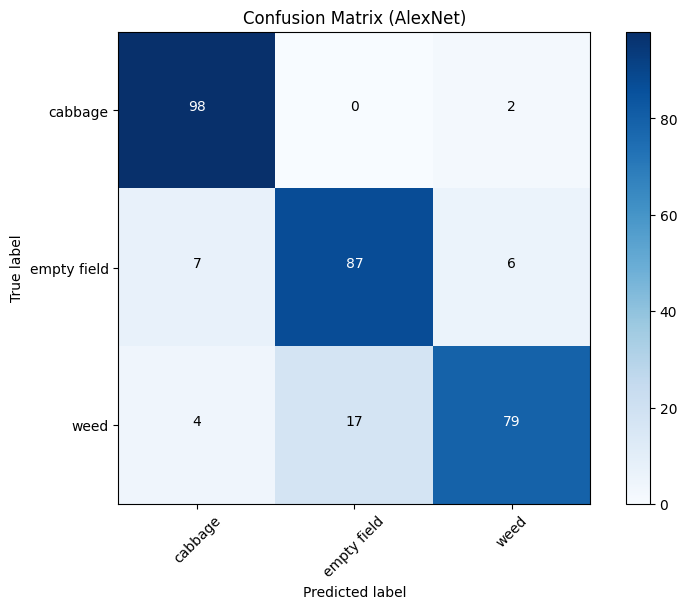

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted labels stored in `alexnet_predictions` and true labels in `true_labels`
alexnet_predictions = []  # Store the predictions made by the AlexNet model
true_labels = []  # Store the true labels for the corresponding images

j = 1

for images_batch, labels_batch in Test_dataset1.take(20):
    for i in range(32):
        first_image = images_batch[i].numpy().astype('uint8')
        first_label = labels_batch[i].numpy()
        batch_prediction = imodelAx.predict(images_batch)
        predicted_label = np.argmax(batch_prediction[i])

        alexnet_predictions.append(predicted_label)
        true_labels.append(first_label)

        print(str(j) + ": " + class_names[first_label] + " ---> " + class_names[predicted_label])
        j += 1
        if j == 301:
            break

# Create the confusion matrix
cm = confusion_matrix(true_labels, alexnet_predictions)

# Print the confusion matrix
print("Confusion Matrix (AlexNet):")
print(cm)

# Plot the confusion matrix as a graph
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (AlexNet)')
plt.colorbar()
classes = ['cabbage', 'empty field', 'weed']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the predicted labels stored in `resnet_predictions` and true labels in `true_labels`
# ... Code to populate `resnet_predictions` and `true_labels` ...

# Create the confusion matrix
#cm = confusion_matrix(true_labels, resnet_predictions)

# Compute metrics
accuracy = accuracy_score(true_labels, resnet_predictions)
precision = precision_score(true_labels, resnet_predictions, average='weighted')
recall = recall_score(true_labels, resnet_predictions, average='weighted')
f1 = f1_score(true_labels, resnet_predictions, average='weighted')

# Print the confusion matrix
print("Confusion Matrix (ResNet):")
print(cm)

# Print metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


ValueError: ignored

In [ ]:
cm

array([[99,  0,  1],
       [ 1, 94,  5],
       [ 4, 20, 76]])